In [45]:
# Function to process text data from a file and output values
def process_text_data_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    
    # Split the text by lines
    lines = text.split('\n')
    
    # Process each line and output the values
    for line in lines:
        print(line)

# Example usage
file_path = r'D:\Exercises\HIWI\EllipDet-master\Industrial\gt\gt_cir3.jpg.txt'
process_text_data_from_file(file_path)

10
296.3329 249.9823 250.6016 251.3089 137.2055
160.4640 96.8347 32.8461 33.8188 46.4836
433.3747 403.7406 32.8914 33.0253 119.7208
297.0886 257.7724 157.0911 163.6675 176.2669
297.9785 264.8464 148.9725 150.2053 129.3061
297.1728 264.5507 106.9419 109.1682 2.7701
296.5026 265.3335 40.6529 41.8343 164.2876
297.2863 263.6125 90.9697 91.4741 38.4819
217.5749 434.6070 7.2413 9.4973 18.7646
93.6064 274.6801 6.5642 10.5175 74.6726



In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import PIL as pil
%matplotlib inline

In [47]:
# Load the image using pil
img_test = cv2.imread(r'D:\Exercises\HIWI\EllipDet-master\Industrial\images\cir3.jpg')

In [48]:
## take file path values and add ellipse to the image using the values
def add_ellipse_to_image(file_path, image):
    ellipses = []
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            if len(values) == 5:
                x, y, major_axis, minor_axis, angle = map(float, values)
                ellipses.append({
                    "center": (int(x), int(y)),
                    "axes": (int(major_axis), int(minor_axis)),  # Divide by 2 to get radii
                    "angle": angle,
                    "start_angle": 0,
                    "end_angle": 360,
                    "color": (0, 255, 0),  # Green color
                    "thickness": 2  # Line thickness
                })
    new_img = image.copy()
    for ellipse in ellipses:
        cv2.ellipse(
            new_img,
            ellipse["center"],
            ellipse["axes"],
            ellipse["angle"],
            ellipse["start_angle"],
            ellipse["end_angle"],
            ellipse["color"],
            ellipse["thickness"]
        )
    return new_img

fin_image = add_ellipse_to_image(file_path, img_test)

In [49]:
def add_ellipse_to_image_direct(ellipses, image):
    new_img = image.copy()
    for ellipse in ellipses:
        cv2.ellipse(
            new_img,
            ellipse["center"],
            ellipse["axes"],
            ellipse["angle"],
            ellipse["start_angle"],
            ellipse["end_angle"],
            ellipse["color"],
            ellipse["thickness"]
        )
    return new_img

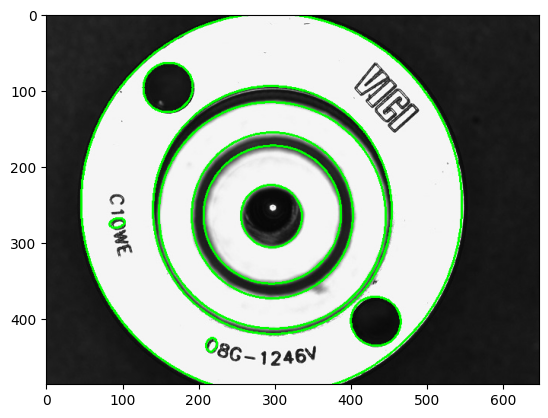

In [50]:
fin_image = add_ellipse_to_image(file_path, img_test)
plt.imshow(fin_image)
plt.show()


In [53]:
## lets resize the image to 640,640 before applying the ellipse
def resize_image(image, filename,target_size):
    original_height, original_width = image.shape[:2]
    scale_x = target_size / original_width
    scale_y = target_size / original_height

    resized_image = cv2.resize(image, (target_size, target_size))

    with open(filename, 'r') as f:
        num_ellipses = int(f.readline().strip())
        resized_ellipses = []
        for _ in range(num_ellipses):
            line = f.readline().strip()
            if line:
                x_center, y_center, width, height, angle = map(float, line.strip().split())

                # Scale ellipse parameters
                x_center = int(x_center * scale_x)
                y_center = int(y_center * scale_y)
                width = int(width * scale_x)
                height = int(height * scale_y)
                
                original_angle_rad = math.radians(angle)
                print(f'original_angle_rad : {original_angle_rad}, angle : {angle}')
                tan_2theta = math.tan(2 * original_angle_rad)
                scale_ratio = scale_y / scale_x
                tan_2theta_prime = (tan_2theta * scale_ratio) / (1 + tan_2theta**2 * (scale_ratio**2 - 1))
                new_angle_rad = 0.5 * math.atan(tan_2theta_prime)
                new_angle = math.degrees(new_angle_rad)
                print(f'new_angle_rad : {new_angle_rad}, new_angle : {new_angle}')
                resized_ellipses.append({
                    'center': (x_center, y_center),
                    'axes': (width, height),  # Divide width and height by 2 for axes
                    'angle': new_angle_rad,
                    "start_angle": 0,
                    "end_angle": 360,
                    "color": (0, 255, 0),  # Green color
                    "thickness": 2
                })
    return resized_image, resized_ellipses

resized_image, resized_ellipse = resize_image(img_test.copy(), file_path, 640)

fin_image_1 = add_ellipse_to_image_direct(resized_ellipse, resized_image)



original_angle_rad : 2.39468772684508, angle : 137.2055
new_angle_rad : -0.06524422980073227, new_angle : -3.7382190051636313
original_angle_rad : 0.8112918681800362, angle : 46.4836
new_angle_rad : -0.04416079993961158, new_angle : -2.530227456461324
original_angle_rad : 2.089522143121627, angle : 119.7208
new_angle_rad : 0.30499472775967484, new_angle : 17.4749106743709
original_angle_rad : 3.0764377672835925, angle : 176.2669
new_angle_rad : -0.08537700349493708, new_angle : -4.891741967733574
original_angle_rad : 2.2568171879130396, angle : 129.3061
new_angle_rad : 0.15854562295671493, new_angle : 9.083995055692222
original_angle_rad : 0.048347365609494916, angle : 2.7701
new_angle_rad : 0.06384577332965227, new_angle : 3.6580933515379885
original_angle_rad : 2.8673595401994363, angle : 164.2876
new_angle_rad : -0.28157493327676564, new_angle : -16.13305529343643
original_angle_rad : 0.671635857423206, angle : 38.4819
new_angle_rad : 0.17777106680968863, new_angle : 10.185531847733

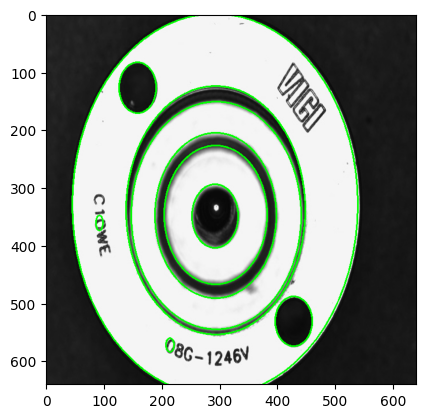

In [54]:
plt.imshow(fin_image_1)
plt.show()

# Ellipse Rcnn Testing

In [2]:
import typer

ModuleNotFoundError: No module named 'typer'

In [ ]:
typer.echo(f"Loading model from {model_path}...")
model = EllipseRCNNModule.load_from_checkpoint(model_path)